In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!jupyter --paths

config:
    C:\Users\win10\.jupyter
    C:\ProgramData\Anaconda3\etc\jupyter
    C:\ProgramData\jupyter
data:
    C:\Users\win10\AppData\Roaming\jupyter
    C:\ProgramData\Anaconda3\share\jupyter
    C:\ProgramData\jupyter
runtime:
    C:\Users\win10\AppData\Roaming\jupyter\runtime


In [3]:
path=r"C:\Users\win10\Desktop\DATA SCIENCE\ExcelR\Assignment Given (Untouched)\3)Logistic Regression\Assignment Given\creditcard.csv"

In [4]:
path=path.replace('\\', '/')

In [5]:
path

'C:/Users/win10/Desktop/DATA SCIENCE/ExcelR/Assignment Given (Untouched)/3)Logistic Regression/Assignment Given/creditcard.csv'

In [6]:
df=pd.read_csv(path, sep=',', index_col=0)

In [7]:
df.info

<bound method DataFrame.info of      card  reports       age  income     share  expenditure owner selfemp  \
1     yes        0  37.66667  4.5200  0.033270   124.983300   yes      no   
2     yes        0  33.25000  2.4200  0.005217     9.854167    no      no   
3     yes        0  33.66667  4.5000  0.004156    15.000000   yes      no   
4     yes        0  30.50000  2.5400  0.065214   137.869200    no      no   
5     yes        0  32.16667  9.7867  0.067051   546.503300   yes      no   
...   ...      ...       ...     ...       ...          ...   ...     ...   
1315  yes        0  33.58333  4.5660  0.002146     7.333333   yes      no   
1316   no        5  23.91667  3.1920  0.000376     0.000000    no      no   
1317  yes        0  40.58333  4.6000  0.026513   101.298300   yes      no   
1318  yes        0  32.83333  3.7000  0.008999    26.996670    no     yes   
1319  yes        0  48.25000  3.7000  0.111619   344.157500   yes      no   

      dependents  months  majorcards  activ

In [8]:
df.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
1,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
2,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
3,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
4,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
5,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [9]:
df.describe()

,reports,age,income,share,expenditure,dependents,months,majorcards,active
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,0.456406,33.213103,3.365376,0.068732,185.057071,0.993935,55.267627,0.817286,6.996967
std,1.345267,10.142783,1.693902,0.094656,272.218917,1.247745,66.271746,0.386579,6.305812
min,0.000000,0.166667,0.210000,0.000109,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,25.416670,2.243750,0.002316,4.583333,0.000000,12.000000,1.000000,2.000000
50%,0.000000,31.250000,2.900000,0.038827,101.298300,1.000000,30.000000,1.000000,6.000000
75%,0.000000,39.416670,4.000000,0.093617,249.035800,2.000000,72.000000,1.000000,11.000000
max,14.000000,83.500000,13.500000,0.906320,3099.505000,6.000000,540.000000,1.000000,46.000000


In [10]:
df.isnull().sum()

card           0
reports        0
age            0
income         0
share          0
expenditure    0
owner          0
selfemp        0
dependents     0
months         0
majorcards     0
active         0
dtype: int64

# Initial Observations 
1)No missing values observed
2)3 Categorical columns found.

In [11]:
# Lets convert catecorical columns to numerical using map function

In [12]:
df["card"]=df["card"].map({"yes":1, "no":0})

In [13]:
df["owner"]=df["owner"].map({"yes":1, "no":0})

In [14]:
df["selfemp"]=df["selfemp"].map({"yes":1, "no":0})

In [15]:
df.selfemp.value_counts()

0    1228
1      91
Name: selfemp, dtype: int64

In [16]:
X=df.drop("card",axis=1)

In [17]:
y=df.card

In [18]:
X.head()     

,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
1,0,37.66667,4.5200,0.033270,124.983300,1,0,3,54,1,12
2,0,33.25000,2.4200,0.005217,9.854167,0,0,3,34,1,13
3,0,33.66667,4.5000,0.004156,15.000000,1,0,4,58,1,5
4,0,30.50000,2.5400,0.065214,137.869200,0,0,0,25,1,7
5,0,32.16667,9.7867,0.067051,546.503300,1,0,2,64,1,5


In [19]:
y.head()

1    1
2    1
3    1
4    1
5    1
Name: card, dtype: int64

In [20]:
X

,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
1,0,37.66667,4.5200,0.033270,124.983300,1,0,3,54,1,12
2,0,33.25000,2.4200,0.005217,9.854167,0,0,3,34,1,13
3,0,33.66667,4.5000,0.004156,15.000000,1,0,4,58,1,5
4,0,30.50000,2.5400,0.065214,137.869200,0,0,0,25,1,7
5,0,32.16667,9.7867,0.067051,546.503300,1,0,2,64,1,5
...,...,...,...,...,...,...,...,...,...,...,...
1315,0,33.58333,4.5660,0.002146,7.333333,1,0,0,94,1,19
1316,5,23.91667,3.1920,0.000376,0.000000,0,0,3,12,1,5
1317,0,40.58333,4.6000,0.026513,101.298300,1,0,2,1,1,2
1318,0,32.83333,3.7000,0.008999,26.996670,0,1,0,60,1,7


In [21]:
y=pd.DataFrame(y)

In [22]:
X=pd.DataFrame(X)

In [23]:
type(X)

pandas.core.frame.DataFrame

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


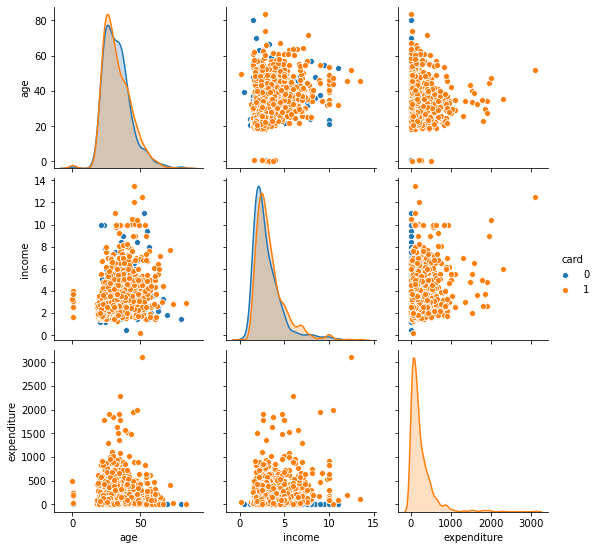

In [24]:
sns.pairplot(data=df,hue='card',  vars= ['age', 'income', 'expenditure',])

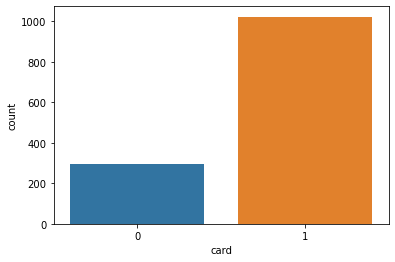

In [25]:
sns.countplot(x='card', data=df, label='Count')

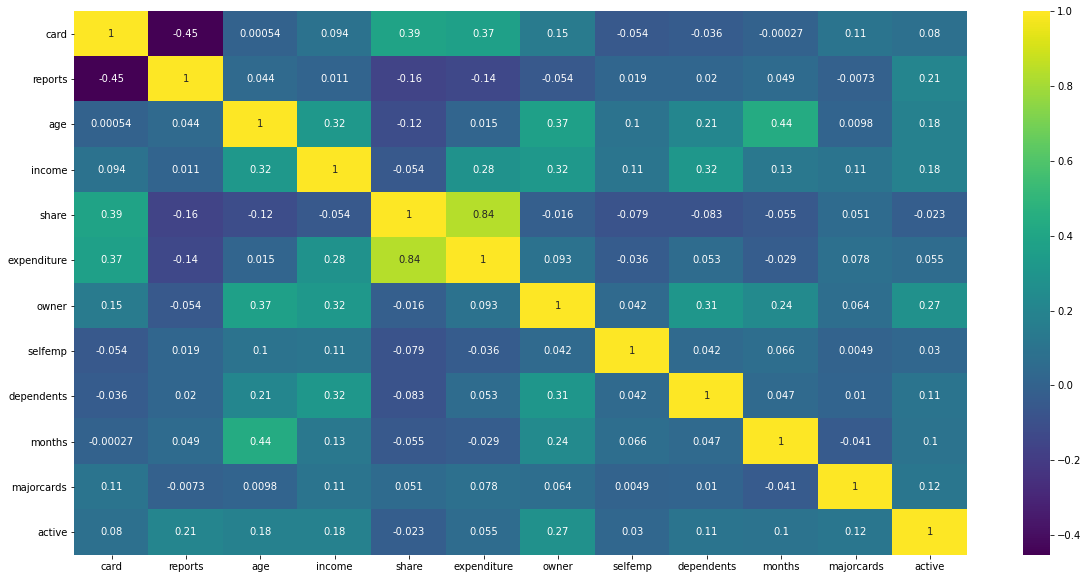

In [26]:
plt.figure(figsize=(20,10))
sns.heatmap(data=df.corr(), annot=True, cmap='viridis')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002581C98C448>,
      dtype=object)

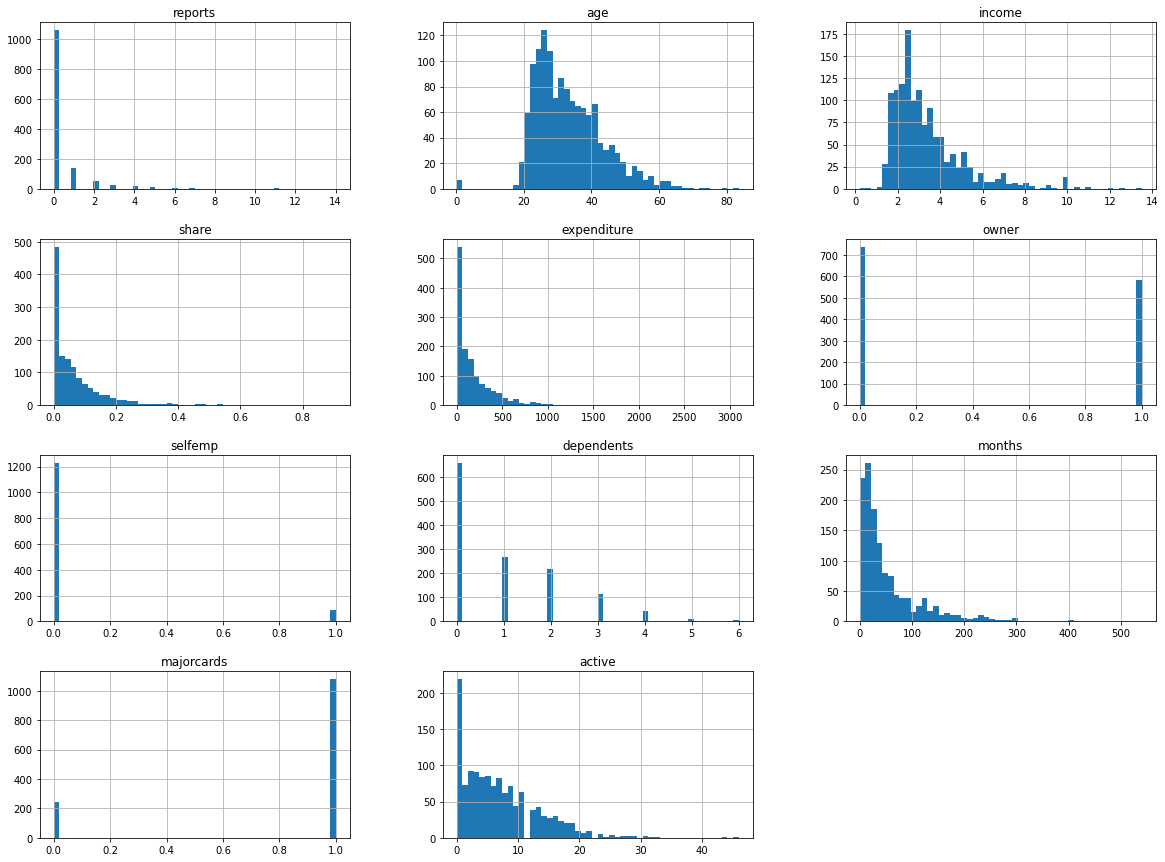

In [27]:
X.hist(bins=50, figsize=(20,15))

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [29]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1055, 11) (264, 11) (1055, 1) (264, 1)


In [30]:
X

,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
1,0,37.66667,4.5200,0.033270,124.983300,1,0,3,54,1,12
2,0,33.25000,2.4200,0.005217,9.854167,0,0,3,34,1,13
3,0,33.66667,4.5000,0.004156,15.000000,1,0,4,58,1,5
4,0,30.50000,2.5400,0.065214,137.869200,0,0,0,25,1,7
5,0,32.16667,9.7867,0.067051,546.503300,1,0,2,64,1,5
...,...,...,...,...,...,...,...,...,...,...,...
1315,0,33.58333,4.5660,0.002146,7.333333,1,0,0,94,1,19
1316,5,23.91667,3.1920,0.000376,0.000000,0,0,3,12,1,5
1317,0,40.58333,4.6000,0.026513,101.298300,1,0,2,1,1,2
1318,0,32.83333,3.7000,0.008999,26.996670,0,1,0,60,1,7


In [31]:
y_train.card.value_counts()

1    818
0    237
Name: card, dtype: int64

In [32]:
import random

Looks like this is a data imbalance problem. As the ratio between the values is nearly 1:4

In [33]:
pos_index = y_train[y_train.values == 1].index
neg_index = y_train[y_train.values == 0].index

if len(pos_index) > len(neg_index):
    higher = pos_index
    lower = neg_index
else:
    higher = neg_index
    lower = pos_index

random.seed(0)
higher = np.random.choice(higher, size=len(lower))
lower = np.asarray(lower)
new_indexes = np.concatenate((lower, higher))

X_train = X_train.loc[new_indexes]
y_train = y_train.loc[new_indexes]

In [34]:
y_train['card'].value_counts()

1    237
0    237
Name: card, dtype: int64

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train2 = pd.DataFrame(sc.fit_transform(X_train))
X_test2 = pd.DataFrame(sc.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

In [36]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, penalty = 'l2')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Logistic Regression (Lasso)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [37]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Lasso),0.920455,0.994624,0.902439,0.946292


In [48]:
from sklearn.metrics import roc_auc_score,auc
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

# ROC Curve

In [69]:
log_roc_auc=roc_auc_score(y_test, y_pred)

In [77]:
fpr, tpr, threshold = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])

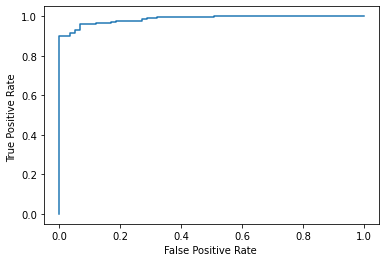

In [79]:
plt.figure()
plt.plot(fpr,tpr,label="Logistic Model" %log_roc_auc)
plt.xlabel("False Positive Rate ")
plt.ylabel("True Positive Rate ")
plt.show()